In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#print(tf.__verison__)
print(sys.version_info)
#for module in mpl, np, pd, sklearn, tf, keras:
 #   print(module.__name__,module.__version__)

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train, x_valid, y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)




sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


In [3]:
#多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])


hidden1 = keras.layers.Dense(30,activation = "relu")(input_deep)
hidden2 = keras.layers.Dense(30,activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_wide,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_wide,input_deep],outputs = [output])


In [4]:
model.summary()
model.compile(loss = "mean_squared_error",optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
______________________________________________________________________________________________

In [5]:
#输入需要变化  因为现在是两个
#总共 8个数据 前五 后六
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]

x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]





history = model.fit([x_train_scaled_wide,x_train_scaled_deep],y_train,
                    validation_data=([x_valid_scaled_wide,x_valid_scaled_deep],
                                     y_valid),
                    epochs=10,callbacks=callbacks)



Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 187us/sample - loss: 1.4298 - val_loss: 0.6208
Epoch 2/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4812 - val_loss: 0.4563
Epoch 3/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4205 - val_loss: 0.4276
Epoch 4/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4036 - val_loss: 0.4173
Epoch 5/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3909 - val_loss: 0.4054
Epoch 6/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3813 - val_loss: 0.3950
Epoch 7/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3712 - val_loss: 0.3802
Epoch 8/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3640 - val_loss: 0.3758
Epoch 9/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3558 - val_

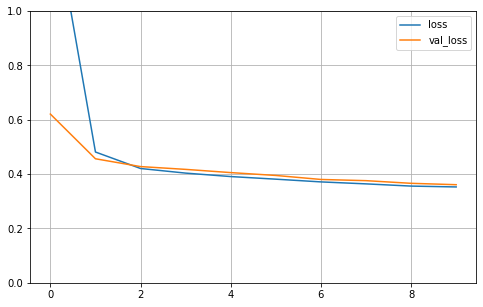

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3578148994334908

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

model.evaluate([x_test_scaled_wide,x_test_scaled_deep],y_test)

In [7]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep],y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3578148994334908